# Amazon Reviews Dataset
This notebook explores the dataset that was downloaded from [Amazon Reviews 2018](https://nijianmo.github.io/amazon/) 


In [1]:
# make sure you run the rs_pttf notebook
!which python

/home/gkoren2/miniconda3/envs/recbole/bin/python


In [2]:
import os
import pandas as pd
import json
from tqdm.notebook import tqdm
import gzip

In [3]:
# amz_dataset_root = '/home/guy/sd1tb/datasets/amazon'
amz_dataset_root = '/home/gkoren2/datasets/recsys/amazon'
os.listdir(amz_dataset_root)

['meta_Luxury_Beauty.json.gz',
 'meta_Industrial_and_Scientific.json.gz',
 'All_Beauty.json',
 'meta_AMAZON_FASHION.csv',
 'meta_AMAZON_FASHION.json',
 'meta_Clothing_Shoes_and_Jewelry.json.gz',
 'meta_Clothing_Shoes_and_Jewelry.csv',
 'AMAZON_FASHION.json',
 'meta_AMAZON_FASHION',
 'meta_AMAZON_FASHION.json.gz',
 'meta_All_Beauty.json.gz',
 'meta_Clothing_Shoes_and_Jewelry.json']

In [4]:
def load_data(meta_file_name):
    cached_filename = os.path.join(amz_dataset_root,os.path.basename(meta_file_name).split('.json')[0]+'.csv')
    if os.path.exists(cached_filename):
        print(f'loading from cached file {cached_filename}')
        df=pd.read_csv(cached_filename)
    else:
        data=[]
        with gzip.open(meta_file_name) as f:
            for l in tqdm(f):
                data.append(json.loads(l.strip()))
        df = pd.DataFrame.from_dict(data)
        df.to_csv(cached_filename,index=False)
    return df 

## Download images

### prepare the list of images

In [5]:
meta_file =os.path.join(amz_dataset_root, 'meta_AMAZON_FASHION.json')
# meta_file =os.path.join(amz_dataset_root, 'meta_Clothing_Shoes_and_Jewelry.json.gz')
meta_file

'/home/gkoren2/datasets/recsys/amazon/meta_AMAZON_FASHION.json'

In [6]:
df = load_data(meta_file)
df.head()

loading from cached file /home/gkoren2/datasets/recsys/amazon/meta_AMAZON_FASHION.csv


,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),['Product Dimensions:\n \n8...,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,['Package Dimensions:\n \n8...,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,['For the professional or amateur magician. R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,['Package Dimensions:\n \n8...,"19,734,184inClothing,ShoesJewelry(",5 star,1940735033,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,['Package Dimensions:\n \n1...,"10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,$4.50,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
url_list = [e for l in df.imageURLHighRes.dropna() if isinstance(eval(l),list) for e in eval(l)]
len(url_list)

### Download the images

In [ ]:
import subprocess

def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

runcmd('echo "Hello, World!"', verbose = True)

In [ ]:
dirname = os.path.join(amz_dataset_root,os.path.splitext(os.path.basename(meta_file))[0])
print(f'creating {dirname}')
os.makedirs(dirname,exist_ok=True)


In [ ]:
import wget
wget.download(url_list,dirname)

In [ ]:
# download n_imgs images starting from index s_img
s_img = 0
n_imgs = 100000
for img in tqdm(url_list[s_img:s_img+n_imgs]):
    cmd=f'wget -P {dirname} {img}'
    runcmd(cmd)

### Viewing downloaded images

In [7]:
from PIL import Image


In [8]:
def image_grid(imgs, rows, cols):
#     assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [9]:
dirname = os.path.join(amz_dataset_root,os.path.splitext(os.path.basename(meta_file))[0])
dirname

'/home/gkoren2/datasets/recsys/amazon/meta_AMAZON_FASHION'

In [10]:
def get_item_details(item_idx):
    print(df.loc[item_idx,'title'])
    try:
        print(eval(df.loc[item_idx,'description']))
    except:
        print('no item description')
    img_fn = [os.path.basename(f) for f in eval(df['imageURLHighRes'][item_idx])]
    img_fn = [os.path.join(dirname,f) for f in img_fn]
    try:
        if len(img_fn)>1:
            imgs=[Image.open(i) for i in img_fn[:5]]
            return image_grid(imgs,5,1)
        else:
            return Image.open(img_fn[0])
    except:
        print('couldnt load images')
        return
    

Womens Sexy Sleeveless Camouflage Print Casual High Waist Bodycon Jumpsuit Sportswear
no item description


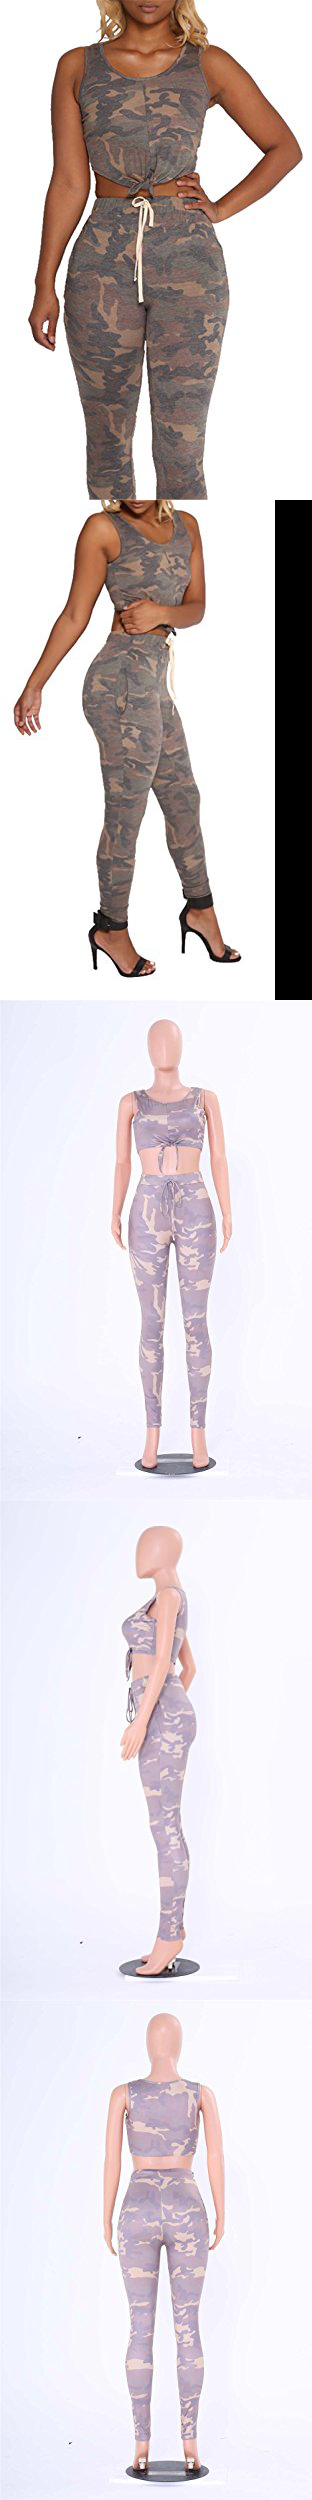

In [15]:
# item_idx =1234   # multiple instances of a watch in the same image 
# item_idx = 123   # several images of a custom
item_idx=7
get_item_details(item_idx)